**RESULT**

*   Models used with hyperparameters :linear regression, linear regression with SGD, Ridge,Lasso, ElasticNet, Polynomial regression, Polynomial Regression with regularization, Decision Tree regression
*   Best Model parameters : Elastic Net Regression Model {Alpha: 0.001, L1:0.2}
*   Elastic Net Train Performance:  0.2271
*   Elastic net Test Performace: 0.1967
*   Train RMSE:28.2794
*   Test RMSE: 30.2617








# 1. Import Libraries and Dataset

In [0]:
pip install feature_engine

In [0]:

import numpy as np

import pandas as pd


import warnings
warnings.filterwarnings("ignore")

import seaborn as snr
import matplotlib.pyplot as plt


In [0]:
# load data

data=pd.read_excel('Patent Data Variables.xlsx')

In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
      data.head()

,pat,fwd,lag_d,lag_y,noc,gy,ay,noi,UMC,firm,MSA,tbm,tbru,PAG,npr,fpr,FT,Cent,EXP_Y,DT,IT,RT,3rd_PT,Rnd_Int,FS
0,6052760,35,895,3,6,2000,1997,3,711,596125,156,54,0.65505,5.019564e+06,6,3,2,0.000022,3.33333,2.66666,9.74898,0.00000,0.0,0.05382,32.0
1,6052764,6,851,3,22,2000,1997,1,711,755619,261,5,0.32000,5.578147e+06,0,0,2,0.000000,9.00000,0.00000,0.00000,0.00000,0.0,0.02247,18.0
2,6052773,66,1778,5,22,2000,1995,3,712,357270,32,28,0.63778,5.072923e+06,25,0,2,0.000000,3.66666,0.00000,0.00000,0.00000,0.0,0.00000,NaN
3,6052775,14,1028,3,13,2000,1997,2,712,551495,261,4,0.37500,5.787045e+06,1,0,2,0.000000,5.00000,3.50000,0.73076,0.00000,0.0,0.09262,17.0
4,6052776,7,915,3,9,2000,1997,3,712,252865,553,7,0.24491,5.696489e+06,5,3,3,0.000000,5.33333,1.33333,2088.45722,0.33333,0.0,0.05907,330.0


# 2. Data Exploration and Preprocessing

In [0]:
 print('Data Information', data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pat          65535 non-null  int64  
 1   fwd          65535 non-null  int64  
 2   lag_d        65535 non-null  int64  
 3   lag_y        65535 non-null  int64  
 4   noc          65535 non-null  int64  
 5   gy           65535 non-null  int64  
 6   ay           65535 non-null  int64  
 7   noi          65535 non-null  int64  
 8   UMC          65535 non-null  int64  
 9   firm         65535 non-null  int64  
 10  MSA          65535 non-null  int64  
 11  tbm          65535 non-null  int64  
 12  tbru         65535 non-null  float64
 13  PAG          65535 non-null  float64
 14  npr          65535 non-null  int64  
 15  fpr          65535 non-null  int64  
 16  FT           65535 non-null  int64  
 17  Cent         65535 non-null  float64
 18  EXP_Y        65535 non-null  float64
 19  DT  

## Missing Values

In [0]:
data.isnull().sum()/len(data)

pat            0.000000
fwd            0.000000
lag_d          0.000000
lag_y          0.000000
noc            0.000000
gy             0.000000
ay             0.000000
noi            0.000000
UMC            0.000000
firm           0.000000
MSA            0.000000
tbm            0.000000
tbru           0.000000
PAG            0.000000
npr            0.000000
fpr            0.000000
FT             0.000000
Cent           0.000000
EXP_Y          0.000000
DT             0.000000
IT             0.000000
RT             0.000000
3rd_PT         0.000000
Rnd_Int        0.000015
FS             0.407828
Firm_Type      0.000000
3rd_PT_new     0.000000
RT_new         0.000000
E_Year_Diff    0.000000
dtype: float64

##Data Categorization





In [0]:
# Data Categraization

categorical = [var for var in data.columns if data[var].dtype == 'O']

temporal = [var for var in data.columns if 'gy' in var or 'ay' in var or 'lag_y'
in var]

discrete = [
    var for var in data.columns if data[var].dtype != 'O'
    and len(data[var].unique()) < 20 and var not in temporal  and var not in categorical
]

continuous = [
    var for var in data.columns if data[var].dtype != 'O'
    if var not in discrete and var not in [ 'fwd']
    and var not in temporal
]

print(f'There are {len(continuous)} continuous variables')
print(f'There are {len(discrete)} discrete variables')
print(f'There are {len(temporal)} temporal variables')
print(f'There are {len(categorical)} categorical variables')

There are 22 continuous variables
There are 2 discrete variables
There are 3 temporal variables
There are 1 categorical variables


In [0]:
data.describe()

,pat,fwd,lag_d,lag_y,noc,gy,ay,noi,UMC,firm,MSA,tbm,tbru,PAG,npr,fpr,FT,Cent,EXP_Y,DT,IT,RT,3rd_PT,Rnd_Int,FS
count,6.553500e+04,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,6.553500e+04,65535.000000,65535.000000,65535.000000,6.553500e+04,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,38808.000000
mean,5.516818e+06,26.730800,923.934127,2.546807,18.856489,1995.320287,1992.773480,2.444038,567.743236,4.364026e+05,275.958251,11.376257,0.497925,4.872959e+06,2.957595,1.084245,2.225330,0.000498,1.638537,0.916463,80.069878,0.255761,0.006082,0.086413,129.095522
std,4.662926e+05,33.322636,364.032954,1.071413,15.708926,4.481961,4.416591,1.792134,180.319111,3.336912e+06,188.192800,15.674491,0.264624,6.978281e+05,10.918525,3.031729,0.661858,0.006973,2.625059,2.324044,420.356247,1.311577,0.078734,6.469271,123.784974
min,4.184347e+06,0.000000,0.000000,0.000000,1.000000,1980.000000,1979.000000,1.000000,2.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.237184e+06,8.000000,691.500000,2.000000,9.000000,1993.000000,1991.000000,1.000000,375.000000,2.500600e+05,142.000000,5.000000,0.360120,4.600381e+06,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000
50%,5.625570e+06,16.000000,888.000000,2.000000,16.000000,1997.000000,1994.000000,2.000000,704.000000,3.867350e+05,260.000000,8.000000,0.560000,4.977990e+06,1.000000,0.000000,2.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.050170,94.000000
75%,5.881240e+06,33.000000,1100.000000,3.000000,24.000000,1999.000000,1996.000000,3.000000,711.000000,6.726890e+05,526.000000,13.000000,0.710770,5.287176e+06,2.000000,1.000000,3.000000,0.000000,2.500000,0.666660,0.000000,0.000000,0.000000,0.073030,225.000000
max,6.836878e+06,841.000000,5285.000000,14.000000,375.000000,2004.000000,1997.000000,32.000000,800.000000,8.520611e+08,610.000000,745.000000,0.944380,6.022089e+06,692.000000,91.000000,7.000000,0.338530,24.000000,46.000000,3161.845890,87.444440,8.250000,1639.000000,854.000000


### Analyzing Data Columns

In [0]:
# Lets print unique values from continuous

for var in continuous:
  print(var, data[var].nunique())
  print(var, data[var][0:20].unique())

pat 65535
pat [6052760 6052764 6052773 6052775 6052776 6052777 6052778 6052780 6052781
 6052782 6052784 6052785 6052786 6052795 6052796 6052801 6052802 6052803
 6052819 6052670]
lag_d 1927
lag_d [ 895  851 1778 1028  915 1191 1020 1152 1036  917  879  840 1267 1023
 1805  839  935 1103  963]
noc 192
noc [ 6 22 13  9 14 35 24 19 25 12 26 17 47 10 64]
noi 27
noi [3 1 2 5 4]
UMC 260
UMC [711 712 713 726 714 705]
firm 8238
firm [596125 755619 357270 551495 252865 280070 767124 767125 373440 278220
 211480 361691 641805 499570]
MSA 354
MSA [156 261  32 553  16  31 240  52 168  13 202]
tbm 238
tbm [54  5 28  4  7 15 19 64 18 14 16  9  0 30 12  6 26]
tbru 5396
tbru [0.65505 0.32    0.63778 0.375   0.24491 0.34668 0.70915 0.72075 0.44447
 0.53063 0.46095 0.71607 0.      0.449   0.66668 0.72003 0.83337 0.75
 0.61112 0.87879]
PAG 63459
PAG [5019564.22222 5578147.      5072923.      5787045.      5696488.85714
 5556357.33333 5414483.31578 5176279.64062 5589587.66666 5598866.92857
 5692770.1875  5

## Data Visulization

In [0]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    fig = plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 2, 1)
    snr.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # boxplot
    plt.subplot(1, 2, 2)
    snr.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

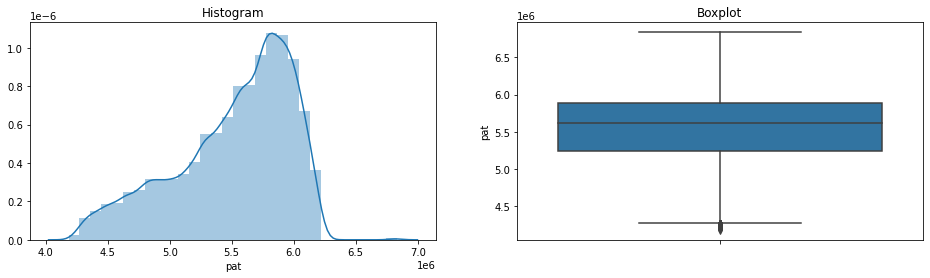

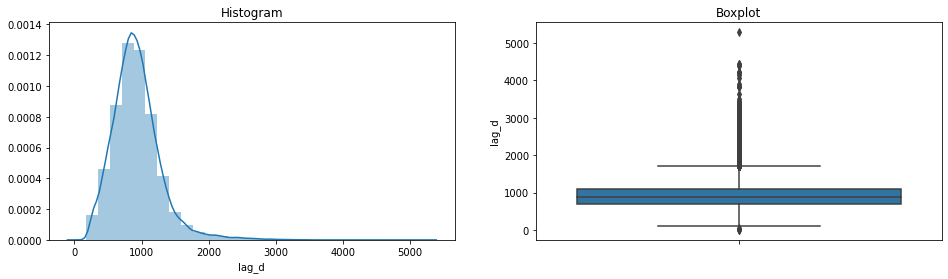

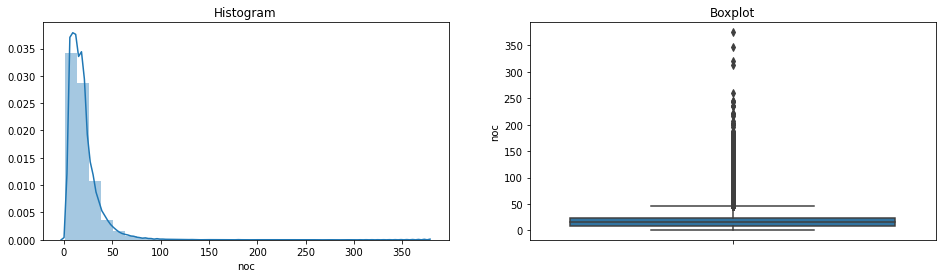

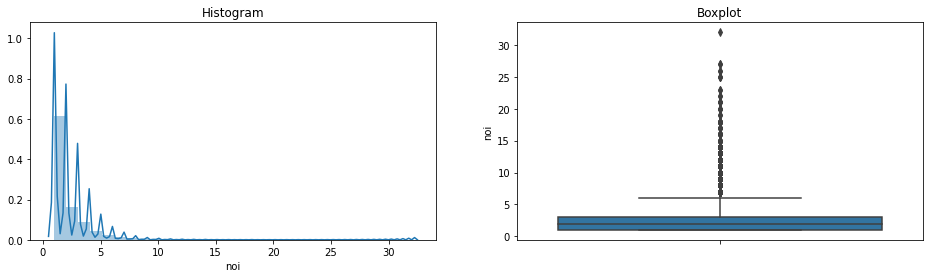

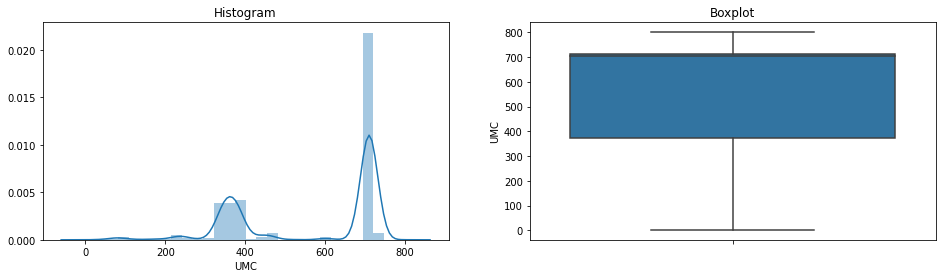

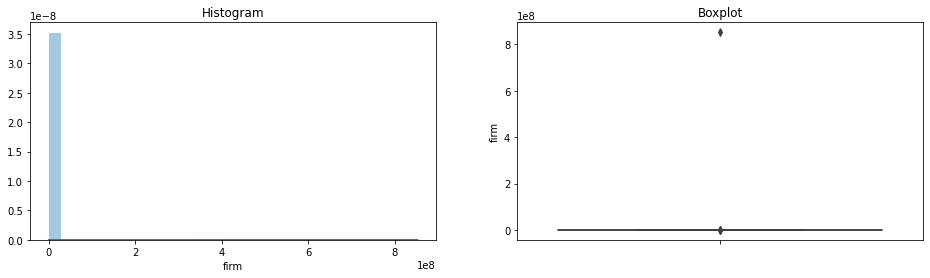

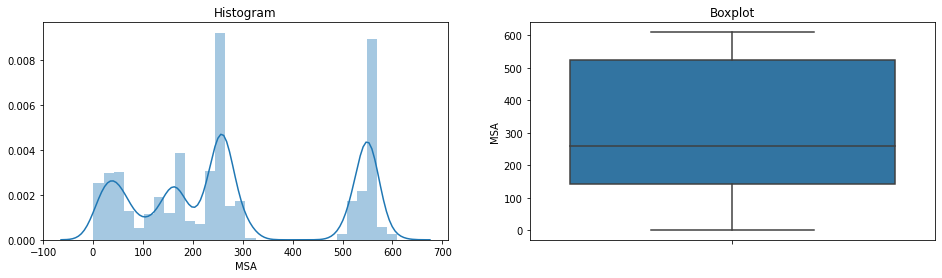

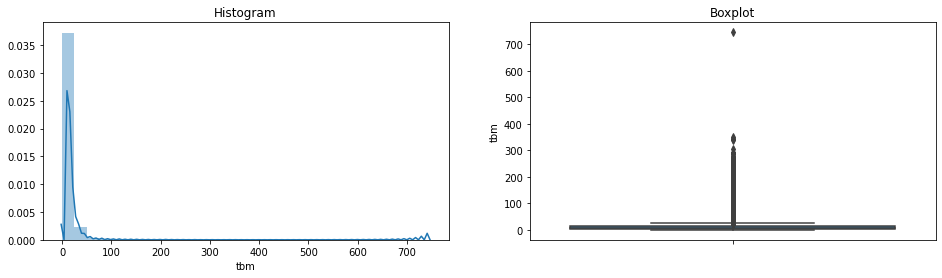

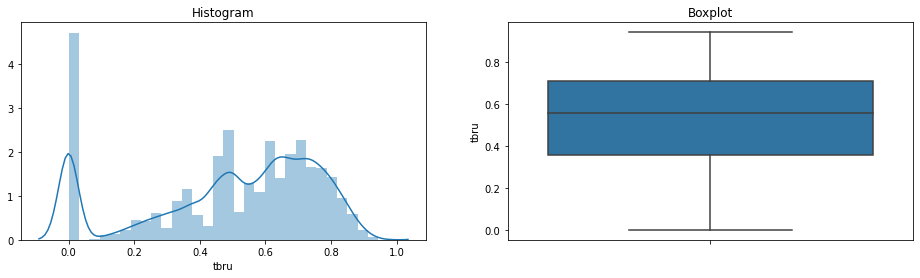

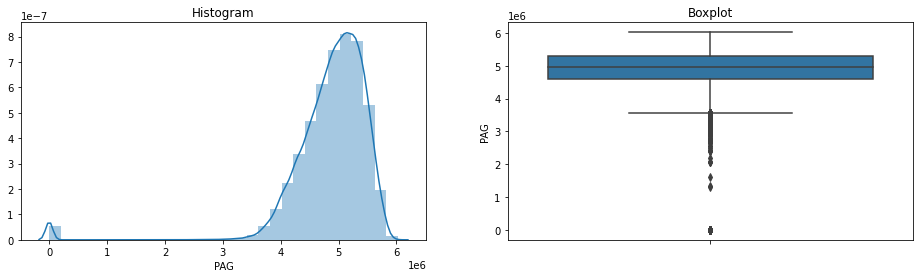

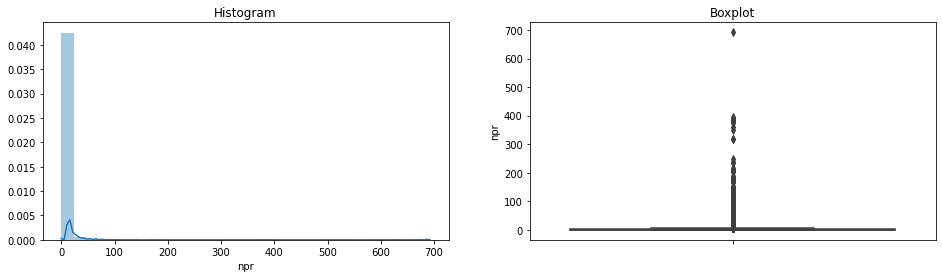

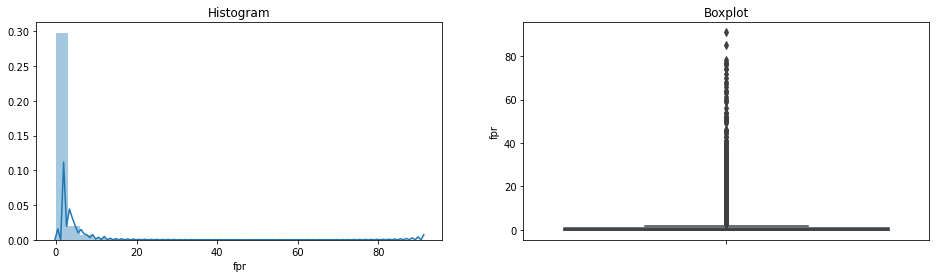

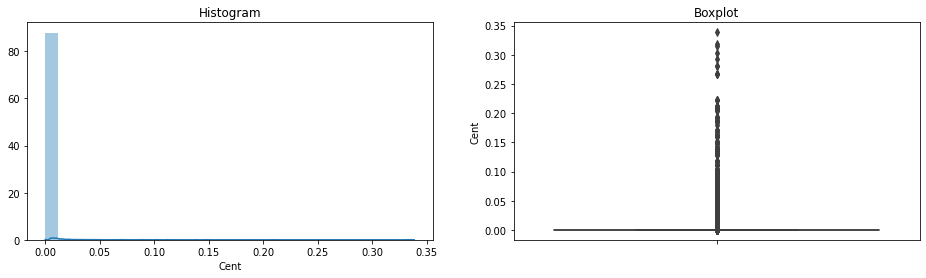

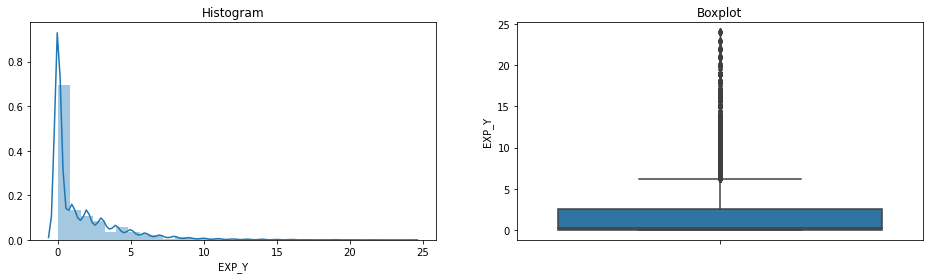

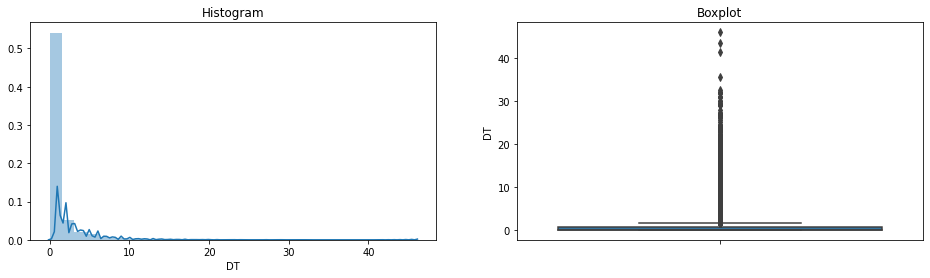

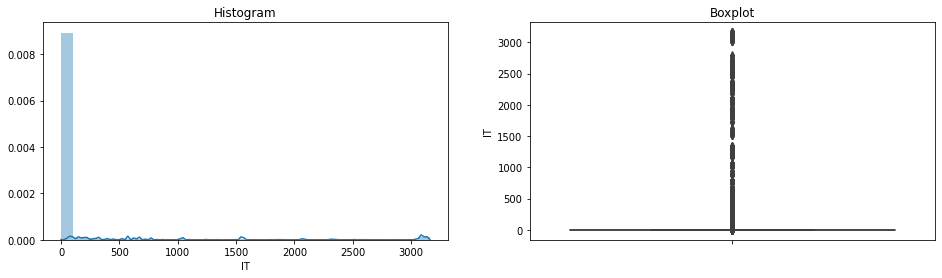

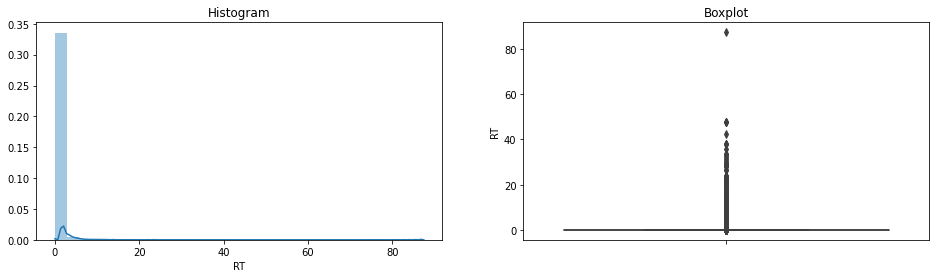

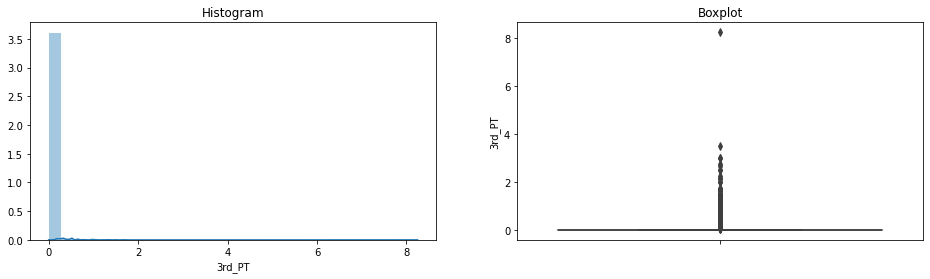

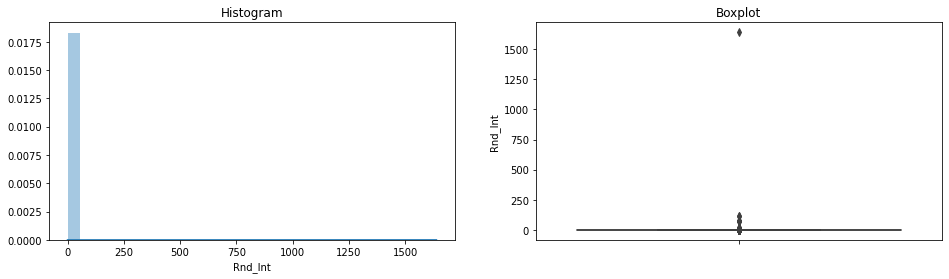

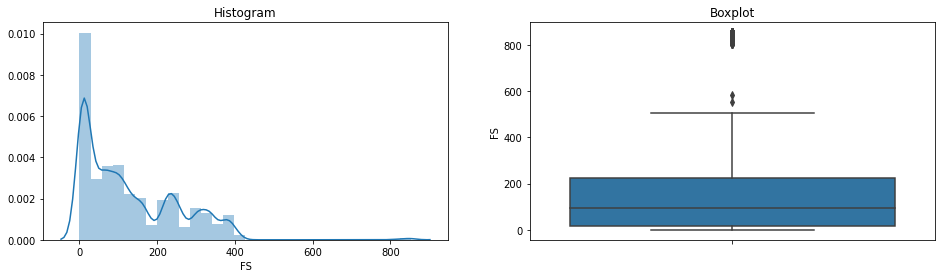

In [0]:
for var in continuous:
  if var != "Firm_Type":
    diagnostic_plots(data, var)

## Data Preprocessing

Lets give detailed attention to the following columns

1. FT 
2. RT
3. 3rd_Pt

As per the definitions, we have 7 different types of firms, thus it would be good choice to convert FT into categorical variable

Also RT and 3_rd Pt are columns consists of unique patents and unique common inventors thus it would be good to convert this data to next postive integer since patents and inventors can not be in the decimal digits

### FT

As per the definitions, we have 7 different types of firms, thus it would be good choice to convert FT into categorical variable

In [0]:
# lets analyze FT

data['FT'].describe()


count    65535.000000
mean         2.225330
std          0.661858
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: FT, dtype: float64

In [0]:
# Converting FT into categorical variable

data['Firm_Type']=0

for i in range(len(data['FT'])):
    if data['FT'][i]==1:
        data['Firm_Type'][i]='unassigned'
    if (data['FT'][i]==2):
        data['Firm_Type'][i]='US non government organization'
    if (data['FT'][i]==3):
        data['Firm_Type'][i]='non US non government organization'
    if (data['FT'][i]==4):
        data['Firm_Type'][i]='US individuals'
    if (data['FT'][i]==5):
        data['Firm_Type'][i]='non US individuals'
    if (data['FT'][i]==6):
        data['Firm_Type'][i]='US government'
    if (data['FT'][i]==7):
        data['Firm_Type'][i]='non US government'

In [0]:
data['Firm_Type'].describe()

count                              65535
unique                                 7
top       US non government organization
freq                               43805
Name: Firm_Type, dtype: object

In [0]:
data['Firm_Type'].value_counts()

US non government organization        43805
non US non government organization    16262
unassigned                             4556
US government                           467
US individuals                          292
non US individuals                       78
non US government                        75
Name: Firm_Type, dtype: int64

### 3rd_PT & RT

Also RT and 3_rd Pt are columns consists of unique patents and unique common inventors thus it would be good to convert this data to next postive integer since patents and inventors can not be in the decimal digits


In [0]:
# Analyze 3rd_PT

data['3rd_PT'].describe()

count    65535.000000
mean         0.006082
std          0.078734
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.250000
Name: 3rd_PT, dtype: float64

In [0]:
# Lets round off  to the next integer

data['3rd_PT_new']=data['3rd_PT'].apply(np.ceil)
# lets examine old and new entries

print('old value: ',data['3rd_PT'].iloc[154])

print('new value:', data['3rd_PT_new'].iloc[154])

old value:  1.33333
new value: 2.0


In [0]:
# Describe new 3rd PT

data['3rd_PT_new'].describe()

count    65535.000000
mean         0.012818
std          0.128329
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          9.000000
Name: 3rd_PT_new, dtype: float64

In [0]:
# Analyze RT

print(data['RT'].describe())

print('Index of the Max value in RT :', data['RT'].idxmax())

count    65535.000000
mean         0.255761
std          1.311577
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         87.444440
Name: RT, dtype: float64
Index of the Max value in RT : 60044


In [0]:
# Lets  round off  to the next integer for RT column

data['RT_new']=data['RT'].apply(np.ceil)

print('old value: ',data['RT'].iloc[60044])

print('new value:', data['RT_new'].iloc[60044])

old value:  87.44444
new value: 88.0


### Find exact year difference from the lag_d column

typical comversion ratio is 1 day: 0.00273973 year

In [0]:
# Lets calculate exact year form lag_d
# typcal comversion ratio is 1 day: 0.00273973 year

data['E_Year_Diff']=0.00

for i in range(len(data['lag_d'])):
    data['E_Year_Diff'][i]=data['lag_d'][i]*0.00273973
    data['E_Year_Diff'][i].round(2)


In [0]:
data['E_Year_Diff']



0        2.452058
1        2.331510
2        4.871240
3        2.816442
4        2.506853
           ...   
65530    0.000000
65531    0.000000
65532    0.000000
65533    0.000000
65534    0.000000
Name: E_Year_Diff, Length: 65535, dtype: float64

### Check for Unusual values

lets find top 10 and bottom 10 values of the columns and lets check wheather it has cetian anamolies

In [0]:
for var in data:
  if data[var].dtype!='O':
    print(var,data[var].nlargest(10))

pat 2088    6836878
2089    6836548
2090    6834186
2091    6832380
2092    6832291
2093    6832202
2094    6829764
2095    6829592
2097    6829236
2096    6829231
Name: pat, dtype: int64
fwd 30361    841
32469    559
53470    551
57201    534
28320    522
10333    498
44156    490
55054    489
43505    487
23120    479
Name: fwd, dtype: int64
lag_d 63903    5285
64821    4449
2089     4437
41240    4386
19269    4235
45024    4226
38098    4186
65421    4156
40286    4059
48664    3915
Name: lag_d, dtype: int64
lag_y 63903    14
64821    13
2089     12
19269    12
38098    12
41240    12
45024    12
65421    12
10712    11
40286    11
Name: lag_y, dtype: int64
noc 6313     375
6797     348
16679    320
51265    313
13206    260
58429    244
61749    244
12238    243
20430    236
36101    235
Name: noc, dtype: int64
gy 2088    2004
2089    2004
2090    2004
2091    2004
2092    2004
2093    2004
2094    2004
2095    2004
2096    2004
2097    2004
Name: gy, dtype: int64
ay 0     1997
1 

There is huge difference between largest and second largest value of the Rnd Investment column

Largest Value ~1630
&
Second Largest ~ 116

clearly this might me recording error, we can replace the value by mean of the column

In [0]:
# replace MAximul value from Rnd

# find location of the maximum value

m=data['Rnd_Int'].idxmax()
id_mean = data['Rnd_Int'].mean()
# replace with mean of the Rnd max
data['Rnd_Int']=data['Rnd_Int'].replace({1639.0:np.nan})
# check for new value

In [0]:
print(id_mean)

0.08641309193560946


In [0]:
data['Rnd_Int'].head()

0    0.05382
1    0.02247
2    0.00000
3    0.09262
4    0.05907
Name: Rnd_Int, dtype: float64

In [0]:
print('new value:', data['Rnd_Int'].iloc[20454])

new value: nan


In [0]:
data['Rnd_Int'].

0    0.05382
1    0.02247
2    0.00000
3    0.09262
4    0.05907
Name: Rnd_Int, dtype: float64



### Removing Redundant Columns

We can drop the following columns:
1. pat
2.lag_y,_ay,gy since I have created new column which denote exact year differece between ay and gy 
3. RT and 3rd P: since new columns creted for them


In [0]:
data.columns

Index(['pat', 'fwd', 'lag_d', 'lag_y', 'noc', 'gy', 'ay', 'noi', 'UMC', 'firm',
       'MSA', 'tbm', 'tbru', 'PAG', 'npr', 'fpr', 'FT', 'Cent', 'EXP_Y', 'DT',
       'IT', 'RT', '3rd_PT', 'Rnd_Int', 'FS', 'Firm_Type', '3rd_PT_new',
       'RT_new', 'E_Year_Diff'],
      dtype='object')

In [0]:
# lets drop unwanted columns such as PAT, lag_d, gy, ay,firm,FS,FT

data1=data.drop(['pat','lag_y','FT','RT','3rd_PT'], axis=1)

In [0]:
data1.columns
#'ay','gy','UMC','firm','MSA'

Index(['fwd', 'lag_d', 'noc', 'gy', 'ay', 'noi', 'UMC', 'firm', 'MSA', 'tbm',
       'tbru', 'PAG', 'npr', 'fpr', 'Cent', 'EXP_Y', 'DT', 'IT', 'Rnd_Int',
       'FS', 'Firm_Type', '3rd_PT_new', 'RT_new', 'E_Year_Diff'],
      dtype='object')

In [0]:
categorical=['gy','ay','firm','UMC','MSA','PAG']

In [0]:
data1[categorical] = data1[categorical].astype('O')
#X_test[categorical] = X_test[categorical].astype('O')

In [0]:
continuous=list(set(list(data1.columns))-set(categorical))

In [0]:
data1.describe()

,fwd,lag_d,noc,noi,tbm,tbru,npr,fpr,Cent,EXP_Y,DT,IT,Rnd_Int,FS,3rd_PT_new,RT_new,E_Year_Diff
count,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65534.000000,38808.000000,65535.000000,65535.000000,65535.000000
mean,26.730800,923.934127,18.856489,2.444038,11.376257,0.497925,2.957595,1.084245,0.000498,1.638537,0.916463,80.069878,0.061404,129.095522,0.012818,0.317693,2.531330
std,33.322636,364.032954,15.708926,1.792134,15.674491,0.264624,10.918525,3.031729,0.006973,2.625059,2.324044,420.356247,0.929474,123.784974,0.128329,1.380214,0.997352
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,691.500000,9.000000,1.000000,5.000000,0.360120,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,1.894523
50%,16.000000,888.000000,16.000000,2.000000,8.000000,0.560000,1.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.050170,94.000000,0.000000,0.000000,2.432880
75%,33.000000,1100.000000,24.000000,3.000000,13.000000,0.710770,2.000000,1.000000,0.000000,2.500000,0.666660,0.000000,0.073030,225.000000,0.000000,0.000000,3.013703
max,841.000000,5285.000000,375.000000,32.000000,745.000000,0.944380,692.000000,91.000000,0.338530,24.000000,46.000000,3161.845890,117.322830,854.000000,9.000000,88.000000,14.479473


# 3. Divide Data into train test




In [0]:
# divide data into train and test data for considering noi as int

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
  data1.drop('fwd', axis=1), data1['fwd'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

X_train.columns

Index(['lag_d', 'noc', 'gy', 'ay', 'noi', 'UMC', 'firm', 'MSA', 'tbm', 'tbru',
       'PAG', 'npr', 'fpr', 'Cent', 'EXP_Y', 'DT', 'IT', 'Rnd_Int', 'FS',
       'Firm_Type', '3rd_PT_new', 'RT_new', 'E_Year_Diff'],
      dtype='object')

# 4. Data Preprocessing Pipeline

1. Scaler for scalling numerical values
2. one hot encoding fo categorcal variables
3. mean value impuration for missing data
4. rare Encoding

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from feature_engine import missing_data_imputers as mdi
from feature_engine import discretisers as dsc
from feature_engine import categorical_encoders as ce
from feature_engine.categorical_encoders import OneHotCategoricalEncoder

In [0]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [0]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 45874 entries, 11158 to 2732
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   lag_d        45874 non-null  int64  
 1   noc          45874 non-null  int64  
 2   gy           45874 non-null  object 
 3   ay           45874 non-null  object 
 4   noi          45874 non-null  int64  
 5   UMC          45874 non-null  object 
 6   firm         45874 non-null  object 
 7   MSA          45874 non-null  object 
 8   tbm          45874 non-null  int64  
 9   tbru         45874 non-null  float64
 10  PAG          45874 non-null  object 
 11  npr          45874 non-null  int64  
 12  fpr          45874 non-null  int64  
 13  Cent         45874 non-null  float64
 14  EXP_Y        45874 non-null  float64
 15  DT           45874 non-null  float64
 16  IT           45874 non-null  float64
 17  Rnd_Int      45873 non-null  float64
 18  FS           27048 non-null  float64
 19  F

('categorical_enc', ce.OrdinalCategoricalEncoder(
        encoding_method='arbitrary', variables=['PAG'])),


In [0]:
patent_pipe = Pipeline([

    # missing data imputation 
    
    ('imputer_num', mdi.MeanMedianImputer(imputation_method='mean',
                                          variables=['FS','Rnd_Int'])),
    
    # categorical encoding 
  ('rare_label_enc', ce.RareLabelCategoricalEncoder(
        tol=0.0001,n_categories=6, variables=['gy', 'ay', 'firm', 'UMC', 'MSA','PAG'])),
  
  #('Ordinal',ce.OrdinalCategoricalEncoder(encoding_method='ordered',variables=['gy', 'ay'])),
   
  ('one hot encoding',ce.OneHotCategoricalEncoder(variables=['gy', 'ay', 'firm', 'UMC', 'MSA','Firm_Type','PAG'],
    drop_last=True)),

   
   
    
    # feature Scaling
    ('scaler', MinMaxScaler()),
    
  
])

In [0]:
patent_pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('imputer_num',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['FS', 'Rnd_Int'])),
                ('rare_label_enc',
                 RareLabelCategoricalEncoder(n_categories=6, tol=0.0001,
                                             variables=['gy', 'ay', 'firm',
                                                        'UMC', 'MSA', 'PAG'])),
                ('one hot encoding',
                 OneHotCategoricalEncoder(drop_last=True, top_categories=None,
                                          variables=['gy', 'ay', 'firm', 'UMC',
                                                     'MSA', 'Firm_Type',
                                                     'PAG'])),
                ('scaler', MinMaxScaler(copy=True, feature_range=(0, 1)))],
         verbose=False)

In [0]:
X_train=patent_pipe.transform(X_train)
X_test=patent_pipe.transform(X_test)

# Regression Models



## Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lr = LinearRegression().fit(X_train, y_train)
cv_scores = cross_val_score(lr, X_train, y_train)

# Mean Cross validation Score
print("Mean Cross-validation scores: {}".format(cv_scores))
print("Mean Cross-validation scores: {}".format(cv_scores.mean()))
# Print Co-efficients
# Check test data set performance
print("LR Performance Train: ", lr.score(X_train,y_train))
print("LR Performance Test: ", lr.score(X_test,y_test))

Mean Cross-validation scores: [ 1.76412657e-01  2.21265617e-01  1.64952589e-01  1.88362020e-01
 -1.37927523e+18]
Mean Cross-validation scores: -2.7585504639232326e+17
LR Performance Train:  0.23038259210693388
LR Performance Test:  0.1910862084507967


## Ridge Regression

In [0]:
# Train a Ridge regression model, report the coefficients, the best parameters, and model performance 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()

#define a list of parameters
param_ridge = {'alpha':[0.001, 0.01, 0.1, 1, 10] }

grid_ridge = GridSearchCV(ridge, param_ridge, cv=10, return_train_score = True)
grid_ridge.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.4f}".format(grid_ridge.best_score_))

print()

#find best parameters
print('Ridge parameters: ', grid_ridge.best_params_)

# print co-eff

print("Ridge.coef_:", grid_ridge.best_estimator_.coef_)
print("Ridge.intercept_:", grid_ridge.best_estimator_.intercept_)

# Check test data set performance
print("Ridge Train Performance: ", grid_ridge.score(X_train,y_train))
print("Ridge Test Performance: ", grid_ridge.score(X_test,y_test))

print()
X_train_preds = grid_ridge.predict(X_train)
X_test_preds = grid_ridge.predict(X_test)

print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))

Best Mean Cross-validation score: 0.1951

Ridge parameters:  {'alpha': 1}
Ridge.coef_: [-16.22278304  87.05464079  41.59702853 ...  -5.53138808  11.15024476
   6.73574374]
Ridge.intercept_: 9.738520507422304
Ridge Train Performance:  0.2296733570101882
Ridge Test Performance:  0.19351566182786628

train mse: 835.3412541467021
train rmse: 28.902270743778974
train r2: 0.2296733570101882

test mse: 944.3599576675573
test rmse: 30.730440245261004
test r2: 0.19351566182786628


##Lasso Regression

In [0]:
from sklearn.linear_model import Lasso
lasso = Lasso(random_state=0)

#define a list of parameters
param_lasso = {'alpha':[0.001,0.015,0.0095, 0.01, 0.1,0.09,0.11,0.05] }
grid_lasso = GridSearchCV(lasso, param_lasso, cv=10, return_train_score = True)
grid_lasso.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.4f}".format(grid_lasso.best_score_))
print()

#find best parameters
print('Lasso parameters: ', grid_lasso.best_params_)

# print co-eff

print("Lasso.coef_:", grid_lasso.best_estimator_.coef_)
print("Lasso.intercept_:", grid_lasso.best_estimator_.intercept_)

# Check test data set performance
print("Lasso Test Performance: ", grid_lasso.score(X_train,y_train))
print("Lasso Test Performance: ", grid_lasso.score(X_test,y_test))

X_train_preds = grid_lasso.predict(X_train)
X_test_preds = grid_lasso.predict(X_test)

print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))

Best Mean Cross-validation score: 0.1953

Lasso parameters:  {'alpha': 0.001}
Lasso.coef_: [-1.94581011e+01  8.77929524e+01  4.11997687e+01 ... -2.06927928e+00
  4.26583735e-02  0.00000000e+00]
Lasso.intercept_: 5.517332245329289
Lasso Test Performance:  0.2271179284678706
Lasso Test Performance:  0.19481153290784048
train mse: 838.112357681609
train rmse: 28.950170253067753
train r2: 0.2271179284678706

test mse: 942.8425459829105
test rmse: 30.705741254412185
test r2: 0.19481153290784048


##Elastic Net

In [0]:
#Elastic net

from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet()

#define a list of parameters
param_elasticnet = {'alpha':[0.0001, 0.001, 0.01, 1], 'l1_ratio' :[0.2,0.4,0.3]}

grid_elasticnet = GridSearchCV(elasticnet , param_elasticnet, cv=10, return_train_score = True)
grid_elasticnet.fit(X_train, y_train)

grid_elasticnet_train_score = grid_elasticnet.score(X_train, y_train)
grid_elasticnet_test_score = grid_elasticnet.score(X_test, y_test)

print('Training set score: ', grid_elasticnet_train_score)
print('Test score: ', grid_elasticnet_test_score)

#find best parameters
print('Best parameters: ', grid_elasticnet.best_params_)
print('Best cross-validation score:', grid_elasticnet.best_score_)

Training set score:  0.22592557407525438
Test score:  0.1957288363427523
Best parameters:  {'alpha': 0.0001, 'l1_ratio': 0.2}
Best cross-validation score: 0.19676453922867682


In [0]:
X_train_preds = grid_elasticnet.predict(X_train)
X_test_preds = grid_elasticnet.predict(X_test)

print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))

train mse: 839.4053453028724
train rmse: 28.972492907978637
train r2: 0.22592557407525438

test mse: 941.7684214252968
test rmse: 30.688245655711516
test r2: 0.1957288363427523


## Polynomial Regression

In [0]:
# Polynomial
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly = PolynomialFeatures()
lreg = LinearRegression()
#define a list of parameters
param_poly = {'polynomialfeatures__degree':range(1,2)}

#apply polynomial regression in pipeline
pipe_poly = make_pipeline(PolynomialFeatures(), LinearRegression())
grid_poly = GridSearchCV(pipe_poly, param_poly,cv=10, n_jobs=-1, return_train_score = True)

# GridSearchCV(estimator, param_grid, scoring=None, n_jobs=None, cv=’warn’, return_train_score=’warn’)
#      estimator : estimator object.
#      param_grid : dict or list of dictionaries
#      scoring :If None, the estimator’s default scorer (if available) is used
#      n_jobs: Number of jobs to run in parallel
#      cv : Determines the cross-validation splitting strategy.
#      return_train_score : If False, the cv_results_ attribute will not include training scores.


grid_poly.fit(X_train, y_train)


#find best parameters
print('Best parameters: ', grid_poly.best_params_)


print('train score: ', grid_poly.score(X_train, y_train))
print('test score: ', grid_poly.score(X_test, y_test))

print("Cross Validation training results", grid_poly.cv_results_['mean_train_score'])
print("Croass Validation testing results", grid_poly.cv_results_['mean_test_score'])

# print the coefficients
print('Poly features: ', grid_poly.best_estimator_.named_steps['polynomialfeatures'].n_output_features_)
print('Coefficients: ', grid_poly.best_estimator_.named_steps['linearregression'].coef_)

Best parameters:  {'polynomialfeatures__degree': 1}
train score:  0.07799855169480874
test score:  0.07885816773209964
Cross Validation training results [0.07807179]
Croass Validation testing results [0.07557607]
Poly features:  23
Coefficients:  [  0.          98.15397504  43.31553311  59.52490862   5.93267161
 -12.36642539  98.35737363   8.30256578   6.9266682  -10.26153244
 -10.6756249   -9.14454766 -21.53632608  10.39928783 -24.55160548
 -71.55132029 -30.24727807   9.22832371  -2.21997685  11.31422422
  -0.42912588   5.23554699  13.51344159]


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.pipeline import make_pipeline
pipe_poly=Pipeline([ 
    ('polynomialfeatures', PolynomialFeatures(degree=2))
    ,('norm_reg',LinearRegression())
])
    
param_poly = [{'norm_reg':[LinearRegression()]},
              {'norm_reg':[Lasso()],'norm_reg__alpha':[0.01,0.1,1]},
              {'norm_reg':[Ridge()],'norm_reg__alpha':[0.01,0.1,1]}
             ]
grid_poly = GridSearchCV(pipe_poly, param_poly,cv=5, return_train_score = True,scoring='r2')

 

grid_poly.fit(X_train, y_train)

print('Best parameters: ', grid_poly.best_params_)


print('train score: ', grid_poly.score(X_train, y_train))
print('test score: ', grid_poly.score(X_test, y_test))

##Linear regression with SGD using Gridsearch

In [0]:
#SGD

# linear regression with SGD using Gridsearch

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler

# create pipeline
reg_sgd_pipe = Pipeline([

    # feature Scaling
    ('scaler', MinMaxScaler()),
    # regression
    ('sgd_reg', SGDRegressor(max_iter=15000, tol = 0.001))
])

param_sgd = {'sgd_reg__eta0':[0.01, 0.05, 0.1 ,0.28,0.5,0.00001]}
grid_sgd = GridSearchCV(reg_sgd_pipe, param_sgd,cv=10, n_jobs=-1, return_train_score = True,
                        scoring=None)

grid_sgd.fit(X_train, y_train)

print("Best parameters: {}".format(grid_sgd.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_sgd.best_score_))

print("SGD Train Performance: ", grid_search_house_pipe.score(X_train,y_train))
print("SGD Test Performance: ", grid_search_house_pipe.score(X_test,y_test))

NameError: ignored

## SGD with Regularization

In [0]:
#SGD With Regularization
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV


reg_sgd_pipe = Pipeline([

    # feature Scaling
    ('scaler', MinMaxScaler()),
    # regression
    ('sgd_reg', SGDRegressor(max_iter=10000, tol = 1e-6))
])



param_sgd = {'sgd_reg__eta0':[0.01, 0.05, 0.1 ,0.5], 'sgd_reg__penalty' :['l1','l2'],'sgd_reg__alpha' :[0.1,0.01,0.001] }
grid_sgd = GridSearchCV(reg_sgd_pipe, param_sgd,cv=5, n_jobs=-1, return_train_score = True)

grid_sgd.fit(X_train, y_train)

print("Best parameters: {}".format(grid_sgd.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_sgd.best_score_))

print('train score: ', grid_sgd.score(X_train, y_train))
print('test score: ', grid_sgd.score(X_test, y_test))

## KNN Regression

In [0]:
#KNN

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

# define a list of parameters

param_knn = {'n_neighbors': range(1,20)}

#apply grid search
grid_knn = GridSearchCV(knn, param_knn, cv=10, return_train_score=True)
grid_knn.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.4f}".format(grid_knn.best_score_))
print()

#find best parameters
print('KNN parameters: ', grid_knn.best_params_)

# Check train data set performance
print("KNN Train Performance: ", grid_knn.score(X_train,y_train))

# Check test data set performance
print("KNN Test Performance: ", grid_knn.score(X_test,y_test))

In [0]:
# random forrest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

forest = RandomForestRegressor(n_estimators=40, random_state=0, max_features=9, max_depth=11)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train )))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))


Accuracy on training set: 0.053
Accuracy on test set: 0.038


##SVM with multiple Kernals (RBF, Poly, Linear, Sigmoid)

In [0]:
# SVM with multiple Kernals (RBF, Poly, Linear, Sigmoid)

param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['poly'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'degree': [1,2]},
              {'kernel': ['sigmoid'],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}]
              

            
              
print("List of grids:\n{}".format(param_grid))

from sklearn.svm import SVC

grid_search = GridSearchCV(SVC(), param_grid, cv=5,
                          return_train_score=True)
grid_search.fit(X_train, y_train)
print('train score: ', grid_search.score(X_train, y_train))
print('test score: ', grid_search.score(X_test, y_test))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

Best parameters:  {'norm_reg': Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False), 'norm_reg__alpha': 1}
train score:  0.07345467042935638
test score:  0.0697117954903762


## Decision Trees

In [0]:
# regression trees

%matplotlib notebook
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeRegressor(random_state=0)

#define a list of parameters
param_dtree = {'max_depth': range(1,20)}

#apply grid search
grid_dtree = GridSearchCV(dtree, param_dtree, cv=10, return_train_score = True)
grid_dtree.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.4f}".format(grid_dtree.best_score_))
print()

#find best parameters
print('Decision Tree parameters: ', grid_dtree.best_params_)

# Check test data set performance
print("Decision  Train Tree Performance: ", grid_dtree.score(X_train,y_train))

# Check test data set performance
print("Decision Test Tree Performance: ", grid_dtree.score(X_test,y_test))


Best Mean Cross-validation score: 0.0644

Decision Tree parameters:  {'max_depth': 5}
Decision  Train Tree Performance:  0.10368955018296443
Decision Test Tree Performance:  0.07196622713584133
